<a href="https://colab.research.google.com/github/divy22x/codsoft/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("/content/SPAM.xlsx")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
df.rename(columns={'v1':'target', 'v2':'sms'}, inplace=True)

In [ ]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isna().sum()

target    0
sms       0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [ ]:
df.describe()

,target,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.loc[df.target=='ham', 'target'] = 0
df.loc[df.target=='spam', 'target'] = 1

In [ ]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: ylabel='target'>

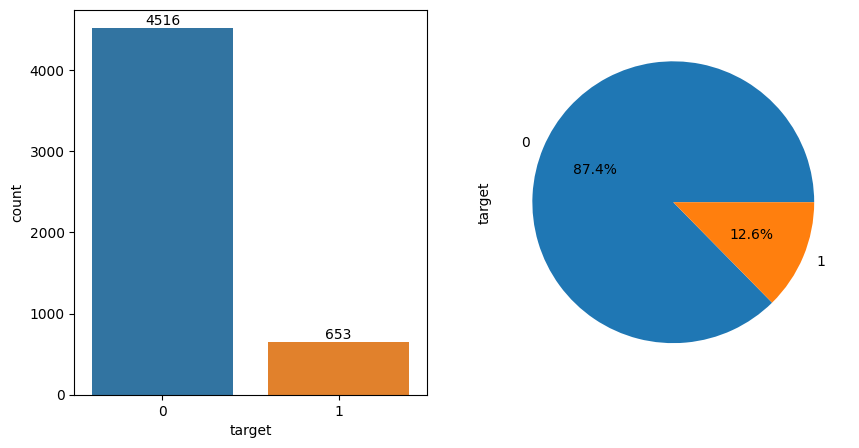

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
plot1 = sns.countplot(df, x='target', ax=ax[0])
for container in plot1.containers:
    plot1.bar_label(container)

df.target.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])

87.4% of the SMSes aren't spam while only 12.6% is actually spam

In [ ]:
!pip install nltk

In [ ]:
import nltk
"""
Punkt Sentence Tokenizer

This tokenizer divides a text into a list of sentences
by using an unsupervised algorithm to build a model for abbreviation
words, collocations, and words that start sentences
"""
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def count_sentences(text):
    if isinstance(text, str):
        return len(nltk.sent_tokenize(text))
    else:
        return 0  # or any other appropriate value for non-string data

df['sentences_count'] = df['sms'].apply(count_sentences)

In [ ]:
df['words_count'] = df['sms'].apply(count_words)

In [ ]:
df['characters_count'] = df['sms'].astype(str).apply(len)
df['characters_count'].head()

0    111
1     29
2    155
3     49
4     61
Name: characters_count, dtype: int64

In [ ]:
df[df.target==1].describe()

,sentences_count,words_count,characters_count
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [ ]:
df[df.target==0].describe()

,sentences_count,words_count,characters_count
count,4516.000000,4516.000000,4516.000000
mean,1.819973,17.123561,70.461913
std,1.383868,13.494243,56.362288
min,0.000000,0.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


spam SMSses have on average more sentences/words count than ham ones, but these have some outliers that surpass the spammy SMSses


<Axes: xlabel='characters_count', ylabel='Count'>

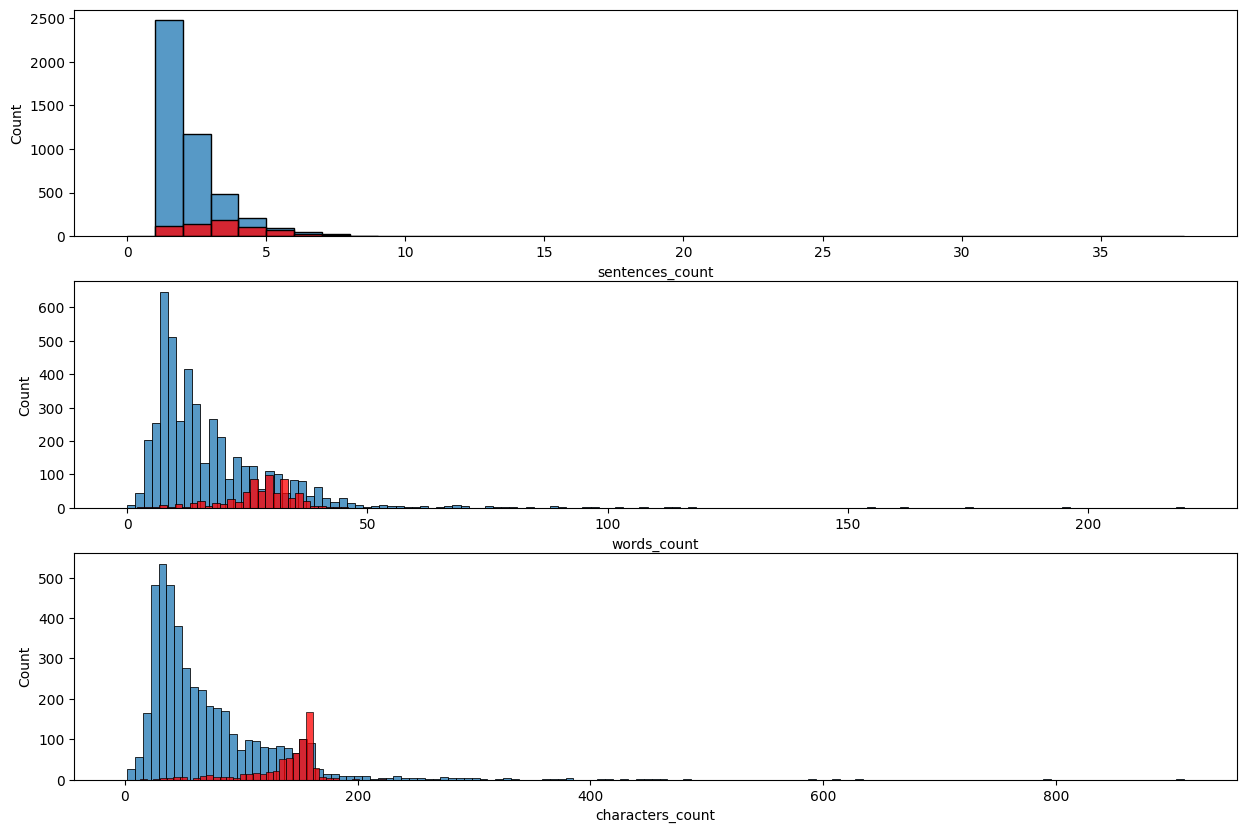

In [ ]:
_, ax=plt.subplots(3,1,figsize=(15,10))

sns.histplot(df[df.target==0]['sentences_count'], ax=ax[0], binwidth=1)
sns.histplot(df[df.target==1]['sentences_count'], color='red', ax=ax[0], binwidth=1)

sns.histplot(df[df.target==0]['words_count'], ax=ax[1])
sns.histplot(df[df.target==1]['words_count'], color='red', ax=ax[1])

sns.histplot(df[df.target==0]['characters_count'], ax=ax[2])
sns.histplot(df[df.target==1]['characters_count'], color='red', ax=ax[2])

Text Preprocessing

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [i for i in text if i.isalnum()]
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]
    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]
    return " ".join(text)

In [ ]:
nltk.download('stopwords')
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
    return text
df['text_transformed'] = df['sms'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, background_color='white', min_font_size=15)

In [ ]:
wc_spam = wc.generate(df[df.target == 1]['text_transformed'].str.cat(sep=' '))

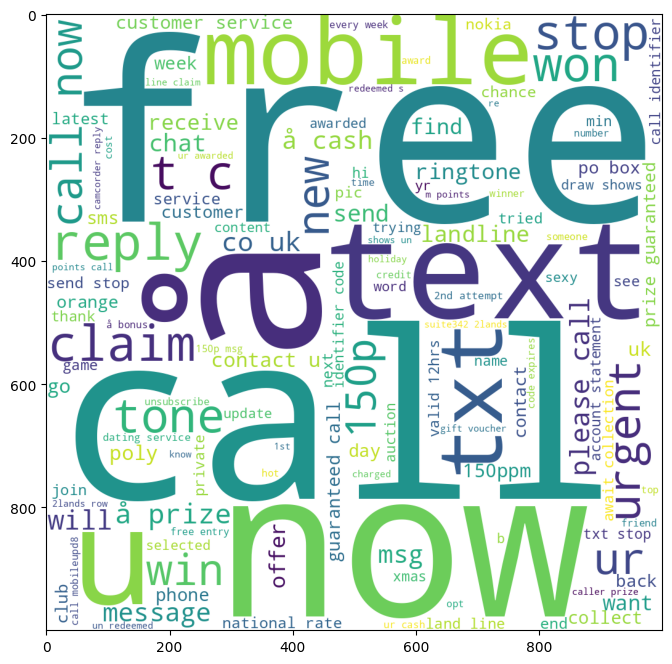

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(wc_spam)

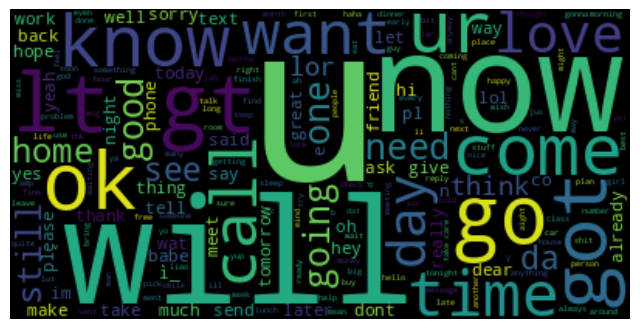

In [ ]:
from wordcloud import WordCloud
df['text_transformed'] = df['text_transformed'].astype(str)
wc_ham = WordCloud().generate(' '.join(df[df.target == 0]['text_transformed']))
plt.figure(figsize=(8, 8))
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['text_transformed']).toarray()
y = df['target'].values

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
def test_models(models):

    scores = {'model': [],
             'accracy score': [],
             'precision score': []}

    _, ax = plt.subplots(1, len(models), figsize=(20,5))

    for index, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        scores['model'].append(type(model).__name__)
        scores['accracy score'].append(accuracy)
        scores['precision score'].append(precision)

        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax[index], fmt=".0f")
        ax[index].set_title(type(model).__name__)

    scores = pd.DataFrame(scores)
    return scores

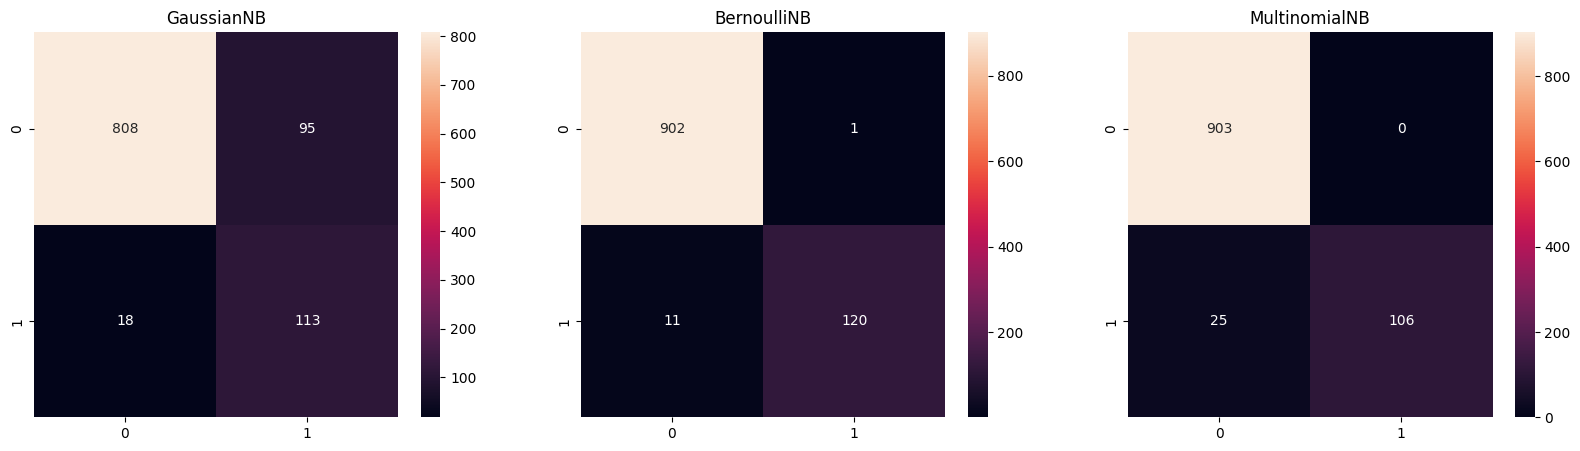

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
"""
If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus. Otherwise, all features are used.
for 4000 it's an experimental value that gaves us good results
"""
tfidf = TfidfVectorizer(max_features=4000)
X = tfidf.fit_transform(df['text_transformed']).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

models = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
]
scores = test_models(models)

In [ ]:
scores

,model,accracy score,precision score
0,GaussianNB,0.890716,0.543269
1,BernoulliNB,0.988395,0.991736
2,MultinomialNB,0.975822,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
models = {"Logistic Regression": LogisticRegression(),"SCV": SVC(),}

In [ ]:
def train_clf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [ ]:
import time

accuracy_scores = []
precision_scores = []

for key, model in models.items():
    start = time.time()
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    stop = time.time()
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ' +
         f'training time(s): {np.round((stop - start), 2)}')

Model: Logistic Regression, accuracy: 0.97, precision: 0.99, training time(s): 1.08
Model: SCV, accuracy: 0.98, precision: 1.0, training time(s): 33.8


In [ ]:
benchmark_df = pd.DataFrame({'Classifier': models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})
benchmark_df.sort_values(by='Precision', ascending=False)

,Classifier,Accuracy,Precision
1,SCV,0.980658,1.000000
0,Logistic Regression,0.965184,0.989691
